In [2]:
import modern_robotics as mr
import sympy as sp
import numpy as np
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()
from Utilities.symbolicFunctions import*
from Utilities.kukaKinematics import*
from Utilities.RobotClass import*

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


# TASK 2

### 1. Using the original Denavit-Hartenberg convention, determine the Denavit-Hartenberg parameters for the Agilus robot.

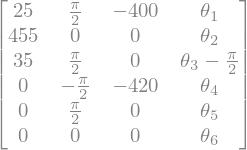

In [3]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')
al1,al2,al3,al4,al5,al6,al7 = sp.symbols('alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6,alpha_7,')

sicConfig = sp.Matrix([[ 25, sp.pi/2 , -400,   th1],
                    [455, 0       ,    0 ,th2],
                    [ 35, sp.pi/2 ,    0,th3 - sp.pi/2],
                    [  0, -sp.pi/2, -420, th4],
                    [  0, sp.pi/2 ,    0,th5],
                    [  0, 0       ,    0,th6]])
sicConfig

#### Here, the first matrix represent the DH parameters in the same formate as in Modern Robotics. The second matrix represent the same table is illustrated as illustrated in Sicilliano. Theta are the free variables of each joint, where we add an additional pi/2 to the third joint to get a get the desired pose illustrated in the report. 

### 2. Determine the end-effector zero position configuration M ∈ SE(3) for the Agilus robot

In [4]:
config1 = sicConfig.subs({th1:0,th2:0,th3:0,th4:0,th5:0,th6:0})
T0i = T_from_sic(config1)               #List of T0i's, T01, T02, T03,...,T06
Tsi = [rotX(sp.pi)*T for T in T0i ]   #List of Tsi's, T1, T2,...,T6

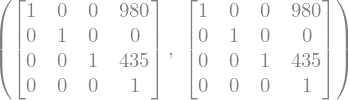

In [5]:
M_DH = Tsi[5] * Tne

M_DH, Me

####  Control: The M derived by visual inspection in Utilities/KukaKinematics and the Slist derived from the DH-formulation are in agreement. 
#### To compansate for the additional rotation of pi/2 in the table, we rotate the third joint with -pi/2 to get the zero-state configuration. As M represent the transformation matrix from the {s} frame to the end effector, and since the table from task one only represent the parameters of each joint, we add an additional T from the n'th link to the end-effector. 

### 3. Determine the space frame screw axes Si for the Agilus robot.

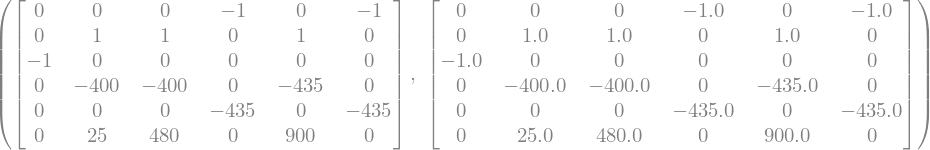

In [9]:
Ai = sp.Matrix([[0,-1,0,0],[1,0,0,0],[0,0,0,0],[0,0,0,0]]) # This is a given matrix due to revolute joints

# S_sp = sp.zeros(6)
# for i in range(6):
#     dot_sum = sp.eye(4)
#     for n in range(i,-1,-1):
#         dot_sum = Tlist_DH[i] * dot_sum
#     S_skew = dot_sum * Ai * sp.Inverse(dot_sum)
#     S_sp[0,i] = S_skew[2,1] 
#     S_sp[1,i] = S_skew[0,2] 
#     S_sp[2,i] = S_skew[1,0] 
#     S_sp[3,i] = S_skew[0,3] 
#     S_sp[4,i] = S_skew[1,3]
#     S_sp[5,i] = S_skew[2,3]

om = sp.zeros(3,6)
om1 = om[:, 0] = Tsi[0][:3, 2]
om2 = om[:, 1] = Tsi[1][:3, 2]
om3 = om[:, 2] = Tsi[2][:3, 2]
om4 = om[:, 3] = Tsi[3][:3, 2]
om5 = om[:, 4] = Tsi[4][:3, 2]
om6 = om[:, 5] = Tsi[5][:3, 2]
q = sp.zeros(3,6)
q1 = q[:,0] = Tsi[0][:3, 3]
q2 = q[:,1] = Tsi[1][:3, 3]
q3 = q[:,2] = Tsi[2][:3, 3]
q4 = q[:,3] = Tsi[3][:3, 3]
q5 = q[:,4] = Tsi[4][:3, 3]
q6 = q[:,5] = Tsi[5][:3, 3]

S_sp = Slist_maker(om,q)

S_sp, sp.Matrix(Slist)

####  Control: The Slist derived by visual inspection in Utilities/KukaKinematics and the Slist derived from the DH-formulation are in agreement. 

### 4. Determine the body-frame screw axes Bi for the Agilus robot

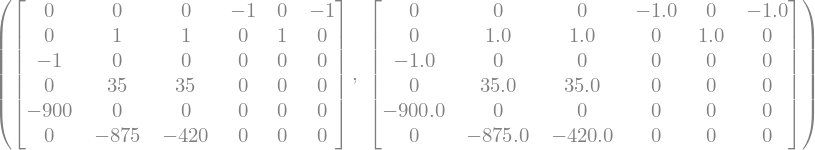

In [10]:
Mb = M6*Tnb                     #Mb = Tsb for robot in zero-config
M_inv = mr.TransInv(Mb)         #Finding inverse of M
Ad_M_inv = mr.Adjoint(M_inv)    #Computing [Ad_M^-1]

#Using B_i = [Ad_M^-1]S_i
Blist2 = sp.zeros(6,6)
for i in range(6):
     Blist2[:, i] = Ad_M_inv @ Slist[:, i]

Blist, Blist2

####  Control: The Blist derived by visual inspection in Utilities/KukaKinematics and calculated Blist are in agreement. 

### 5. Visualization 
#### Visualization using custom class in Utilities module. The big coordinate system being the {s}-frame and joint-frames oriented with z-axis along joint screw-axis. Joint 6 is coloured red
#### Axis colours:
####    -Blue   -Z axis and joint screw-axis
####    -Red    -X axis
####    -Green  -Y axis

### Visualization of DH frames:

In [12]:
#Finding M01, M02..., from List of Tsi developed in task 2.2
Mlist_DH = np.array(Tsi,dtype=float)

#Visualize frames
KukaDH = Robot(Mlist_DH, ['z','-z','x','y','-z','z'], Tne)
KukaDH.joints[5].set_colour([1,0,0])
KukaDH.draw_robot()

WebVisualizer(window_uid='window_1')

#### 

#### DH-frames shown as joint-frames. Note that: __Birk insert__ and that all three wrist joints are co-located with {b}. {e} is translated 80mm along x-axis of {b} to show orientation clearly.

In [13]:
KukaDH.transform(Slist,[0,0,np.pi/2,0,0,0])
T = KukaDH.current_config
KukaDH.draw_robot()

WebVisualizer(window_uid='window_2')

#### Robot shown in the config that was used for the DH-analysis

### Visualization of Kuka robot in zero-config. Showing Me, Si and Bi:
#### Me is the chains last frame (without grey joint), screw axes as the joint frames' z-axis (both Bi and Si).
#### {4} is drawn outside of the wrist to show functionality better.
#### {b} is located inside the wrist(red/grey) and oriented as {e}

In [15]:
Kuka = Robot(Mlist, ['z', '-z', 'x', 'x', '-z','x'], Tne)
Kuka.joints[5].set_colour([1,0,0]) 
Kuka.joints[4].set_colour([0.2,0.2,0.2])
Kuka.draw_robot()

WebVisualizer(window_uid='window_3')